## Customer Purchases History Analysis

### Objective

Analyze customer purchase data from Supermarket X using the Apriori algorithm to uncover product association rules and provide actionable insights to improve sales and marketing strategies.

### Dataset Description

**Transactions**: Records of customer purchases.

### Attributes:
Dataset was transformed to include these features:

**Transaction ID**: Unique identifier for each purchase.

**Item**: Products purchased in each transaction.

### Methodology

**Data Exploration**: Inspected the dataset and cleaned where necessary using Pandas.

**Preprocessing**: Grouped items by transactions and applied one-hot encoding for Apriori analysis.

**Apriori Algorithm**: Generated frequent itemsets and association rules using minimum support and confidence thresholds.

**Analysis**: Identified key purchasing patterns and actionable insights.

### Key Findings

**Frequent Itemsets**: Example - {Mineral Water, Chcolate} purchased together in 12% of transactions.

**Association Rules**: Example - {Bread} -> {Butter} with:

**Confidence**: 75% (likely to buy Butter after Bread).

**Lift**: 

### Conclusion
The analysis provides actionable insights into customer purchasing behavior, enabling Supermarket X to optimize marketing, promotions, and store layout for increased sales and better customer experience.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mlxtend
from mlxtend.preprocessing import TransactionEncoder


In [7]:
input_file = r"C:\Users\Pearl\OneDrive\Documents\GOMYCODE TRAINING\Market_Basket_Optimisation.csv"  # Replace with your file name
output_file = "transposed_1.csv"

# Read the CSV file
df = pd.read_csv(input_file)

# Transpose the DataFrame
transposed_df = df.transpose()

# Reset index and add headers
transposed_df.reset_index(inplace=True)
transposed_df.columns = transposed_df.iloc[0]  # Set the first row as headers
transposed_df = transposed_df[1:]  # Remove the now redundant first row

# Save the transposed DataFrame to a new CSV file
transposed_df.to_csv(output_file, index=False)

print(f"Data has been transposed and saved to {output_file}")




Data has been transposed and saved to transposed_1.csv


In [17]:
input_file = "transposed.csv"  # Replace with your input file name
output_file = "collapsed_data_2.csv"

# Read the CSV file
df = pd.read_csv(input_file)

# Initialize an empty DataFrame to hold the transformed data
collapsed_data = pd.DataFrame(columns=["Transaction", "Data"])

# Loop through each column and create the desired format
for i, column in enumerate(df.columns):
    temp_df = pd.DataFrame({
        "Transaction": f"transaction_{i + 1}",
        "Data": df[column]
    })
    collapsed_data = pd.concat([collapsed_data, temp_df], ignore_index=True)

# Save the collapsed data to a new CSV file
collapsed_data.to_csv(output_file, index=False)


Data has been collapsed and saved to collapsed_data_2.csv


In [111]:
dataset = pd.read_csv(r"C:\Users\Pearl\OneDrive\Documents\GOMYCODE TRAINING\collapsed_data_2.csv")

In [112]:
dataset.dropna(axis = 0, inplace= True)

In [113]:
## renaming dataset
dataset.rename(columns = {"Transaction":"Transaction_ID", "Data":"Item"}, inplace = True)

In [114]:
dataset.head()

,Transaction_ID,Item
0,transaction_1,shrimp
1,transaction_1,almonds
2,transaction_1,avocado
3,transaction_1,vegetables mix
4,transaction_1,green grapes


In [115]:
## understanding data
dataset.describe()

,Transaction_ID,Item
count,29363,29363
unique,7501,120
top,transaction_1,mineral water
freq,20,1788


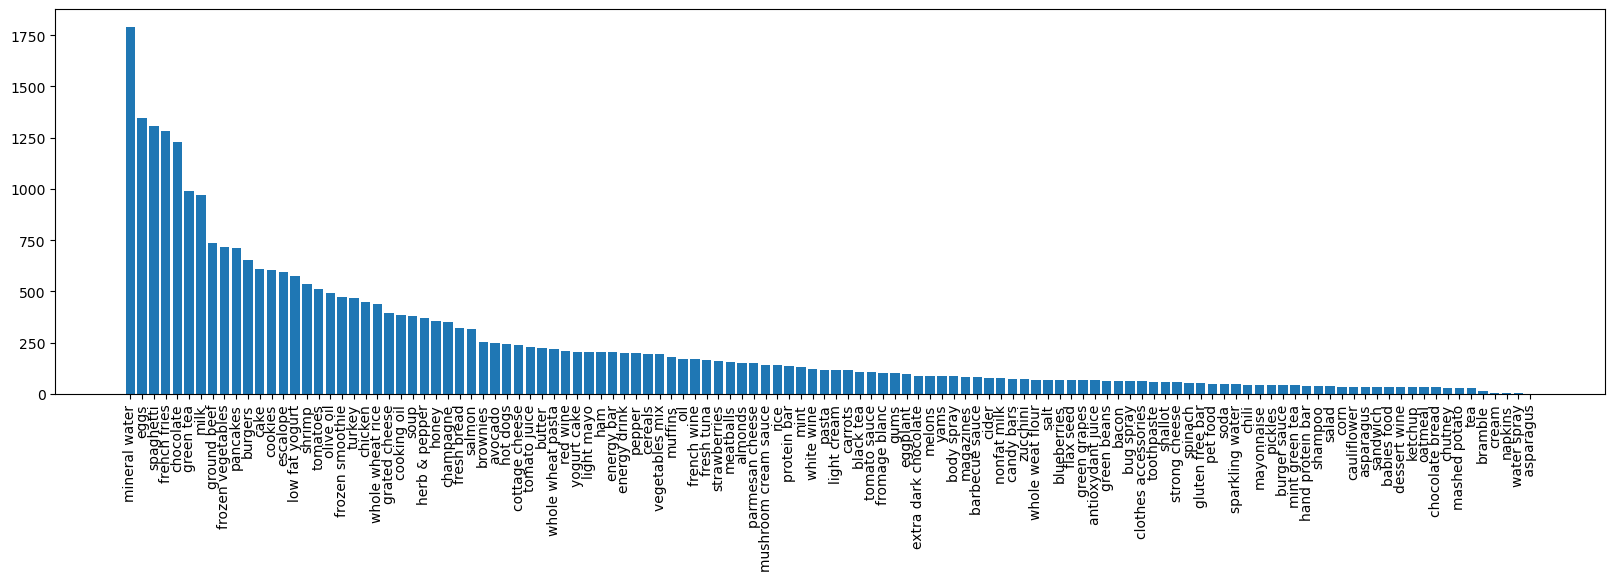

In [116]:
# Graph of Number of Items bought of particular category
plt.rc("figure", figsize=(20, 5))
plt.bar(dataset["Item"].value_counts().index, dataset["Item"].value_counts())
plt.xticks(rotation=90);

In [117]:
## Creating a dictionary to store each item and its frequency count
Dict_items = {}

for item in dataset["Item"]:
    Dict_items[item] = Dict_items.get(item,0)+1

In [118]:
#Creating a list from key and value in the dictionary
keys = []
vals = []

for i, k in Dict_items.items():
    if k> 50:
        keys.append(i)
        vals.append(k)

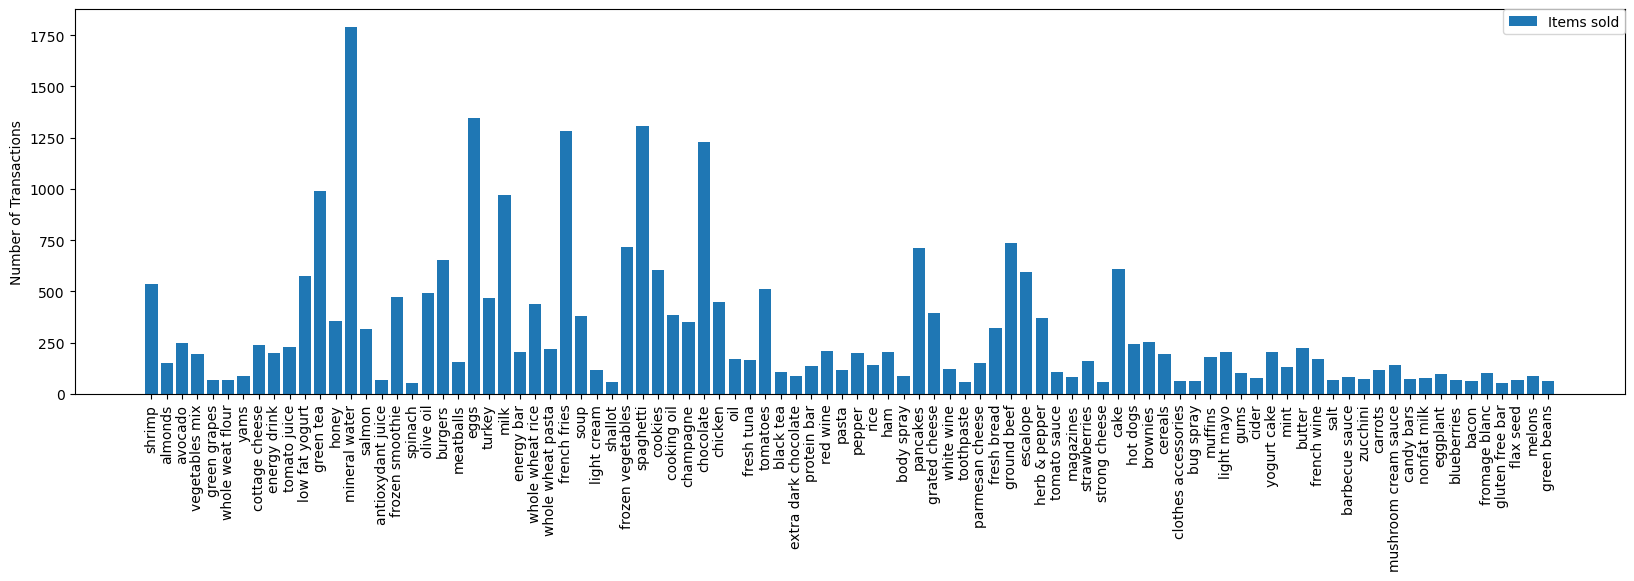

In [119]:
# Visualising the frequency of items purchased above 30 times
plt.bar(keys, vals, label= "Items sold")
plt.rcParams["figure.figsize"] = [20, 10]
plt.ylabel("Number of Transactions")
plt.xticks(list(keys), rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc="best", borderaxespad=0.)

In [121]:
# Convert the dataset to transactional data format
# reading in same dataset but transformed for use with Transaction Encoder
data_path =r"C:\Users\Pearl\OneDrive\Documents\GOMYCODE TRAINING\Market_Basket_Optimisation.csv"
data = pd.read_csv(data_path, header=None)

# Convert the dataset into a list of transactions
transactions = []
for i in range(1,len(data)):
    transaction = data.iloc[i].dropna().tolist()
    transactions.append(transaction)

# Use the TransactionEncoder to transform the data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transformed_data = pd.DataFrame(te_ary, columns=te.columns_)

#output data
transformed_data.head()


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [131]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [147]:
# Generate frequent itemsets with minimum support
frequent_itemsets = apriori(transformed_data, min_support=0.04, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179709,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


In [148]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold = 0.09, num_itemsets =7501)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
4,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,1.0,0.017507,1.088672,0.561638,0.138413,0.081449,0.294127
5,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,1.0,0.017507,1.305401,0.474369,0.138413,0.233952,0.294127
6,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,1.0,0.017105,1.089850,0.467950,0.150000,0.082443,0.285856
7,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,1.0,0.017105,1.209650,0.409465,0.150000,0.173315,0.285856
8,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
9,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796


In [149]:
confidence_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold = 0.2, num_itemsets =7501)
confidence_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
4,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,1.0,0.017507,1.305401,0.474369,0.138413,0.233952,0.294127
5,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,1.0,0.017105,1.089850,0.467950,0.150000,0.082443,0.285856
6,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,1.0,0.017105,1.209650,0.409465,0.150000,0.173315,0.285856
7,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
8,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796


### Analysis of Rule
Exploring the associations with the highest lift and confidence.

#### Ground beef and Mineral water.
**Metrics**:
- Confidence: 41.66%
41.66% of the transactions that included ground beef also included mineral water.
- Lift: 1.75
Customers buying ground beef are 1.75 times more likely to buy mineral water compared to random purchases.


#### Milk and Mineral Water
**Metrics**:
- Confidence: 37.03%
37.03% of the transactions that included milk also included mineral water.
- Lift: 1.55
Customers buying milk are 1.55 times more likely to buy mineral water compared to random purchases.

#### Chocolate and Mineral Water
**Metrics**:
- Confidence: 32.14%
32.14% of the transactions that included chocolate also included mineral water.
- Lift: 1.34
Customers buying chocolate are 1.55 times more likely to buy mineral water compared to random purchases.

#### Spaghetti and Mineral Water
**Metrics**:
- Confidence: 34.30%
34.30% of the transactions that included spaghetti also included mineral water.
- Lift: 1.43
Customers buying spaghetti are 1.43 times more likely to buy mineral water compared to random purchases.


### Recommendations:
#### Cross-Selling Opportunity:
Place items with high association with mineral water (for example, as stated above groundbeef and mineral water, milk and mineral water, etc) close to each other in the store or on the website to encourage bundled purchases.
Offer discounts or promotions when both items are purchased together.

### Targeted Marketing:
Identify customers who frequently buy any of the items with high association(Groundbeef and Mineral water, milk and mineral water, etc) as an add-on item through personalized offers or emails.

### Product Pairing:
Suggest this pairing in online shopping carts (e.g., "Customers who bought ground beef also bought mineral water").